# Housing

### Datasets
California Housing Prices [From Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices)

### Content
- Visualization:
    - Housing Prices
    - Ocean Proximity
- Classification
    - House Pricing Prediction
        - ***Random Forrest***
        - ***Linear Regression***
        - ***KNN Regressor***



## Basic Visualization

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
import matplotlib.pyplot as plt
# ---------- data science ----------
from sklearn.model_selection import train_test_split

# ---------- preparations ----------
ds = pd.read_csv('housing.csv')
# ds.dropna()
ds['total_bedrooms'] = ds['total_bedrooms'].fillna(ds['total_bedrooms'].median())
ds['total_rooms'] = ds['total_rooms'].fillna(ds['total_rooms'].median())
mapping = {k: v for v, k in enumerate(ds.ocean_proximity.unique())}
ds['ocean_proximity_num'] = ds.ocean_proximity.map(mapping)
print(ds.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity', 'ocean_proximity_num'],
      dtype='object')


## Basic visualization

#### Housing Prices

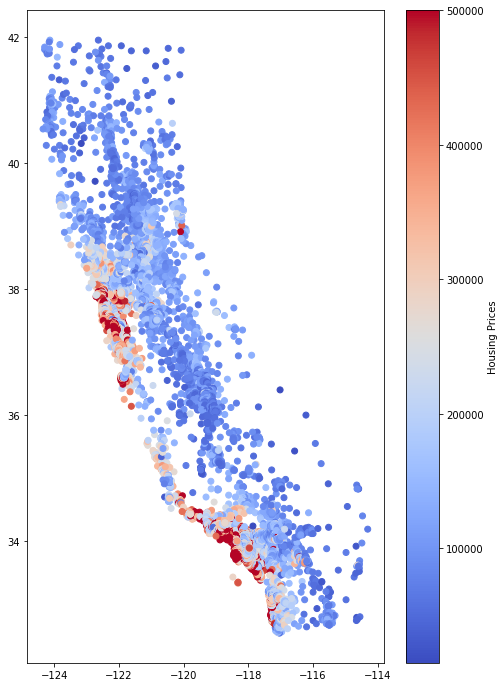

In [3]:
plt.figure(figsize = (8, 12))
s = plt.scatter(ds['longitude'], ds['latitude'], c = ds['median_house_value'], cmap = 'coolwarm')
plt.colorbar(s, label = 'Housing Prices')
plt.show()

#### Ocean Proximity Visualization

<Figure size 1800x360 with 0 Axes>

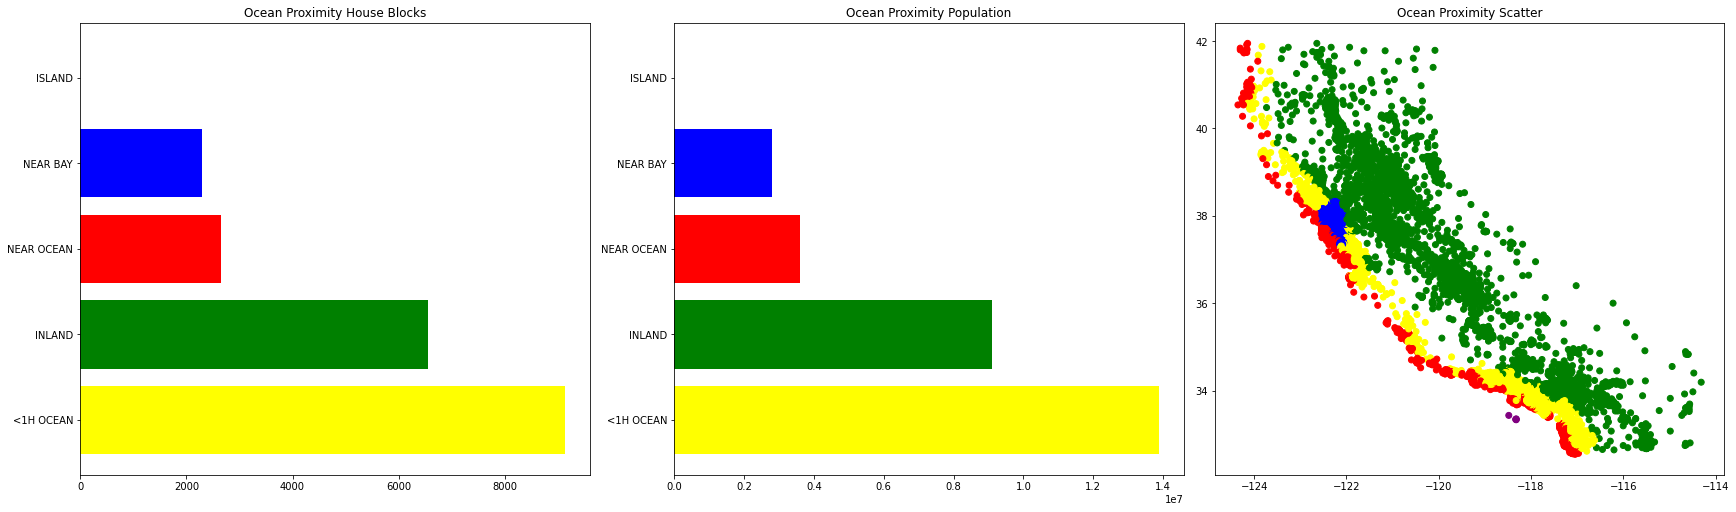

In [15]:
plt.figure(figsize = (25, 5))
colors = {'NEAR OCEAN':'red', 'INLAND':'green', 'NEAR BAY':'blue', '<1H OCEAN':'yellow', 'ISLAND':'purple'}
vc = ds["ocean_proximity"].value_counts()
ds_ = ds.groupby('ocean_proximity')['population'].sum().sort_values()
ds_ = ds_.iloc[::-1]

fig, axes = plt.subplots(1, 3, figsize = (24, 7), constrained_layout = True)
axes[0].barh(vc.index, vc, color = ['yellow', 'green', 'red', 'blue', 'purple'])
axes[1].barh(ds_.index, ds_, color = ['yellow', 'green', 'red', 'blue', 'purple'])
axes[2].scatter(ds['longitude'], ds['latitude'], c = ds['ocean_proximity'].map(colors))

axes[0].set_title('Ocean Proximity House Blocks')
axes[1].set_title('Ocean Proximity Population')
axes[2].set_title('Ocean Proximity Scatter')

plt.show()

## Classification

#### Random Forrest: Predict House Prices

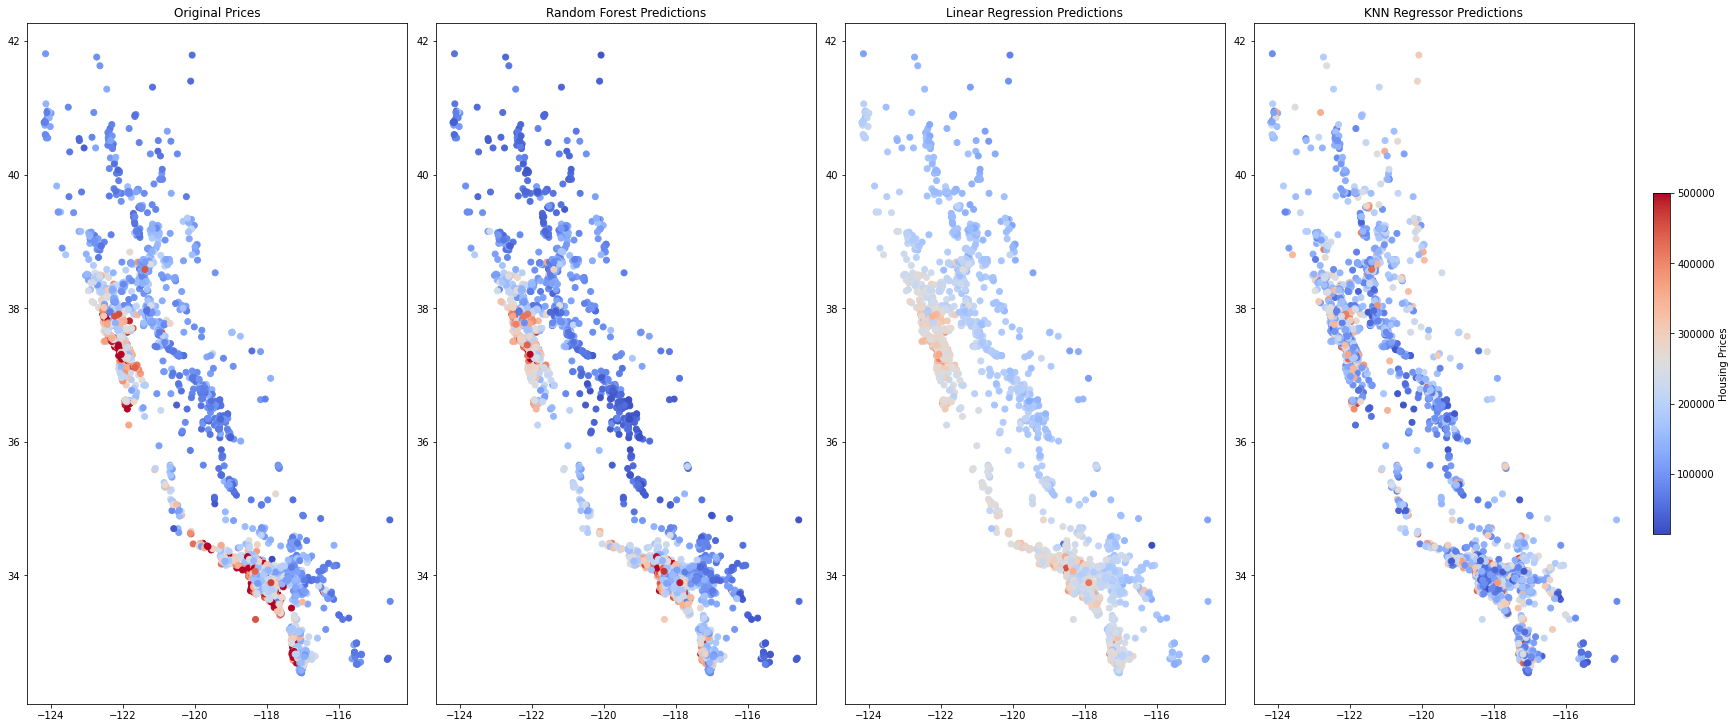

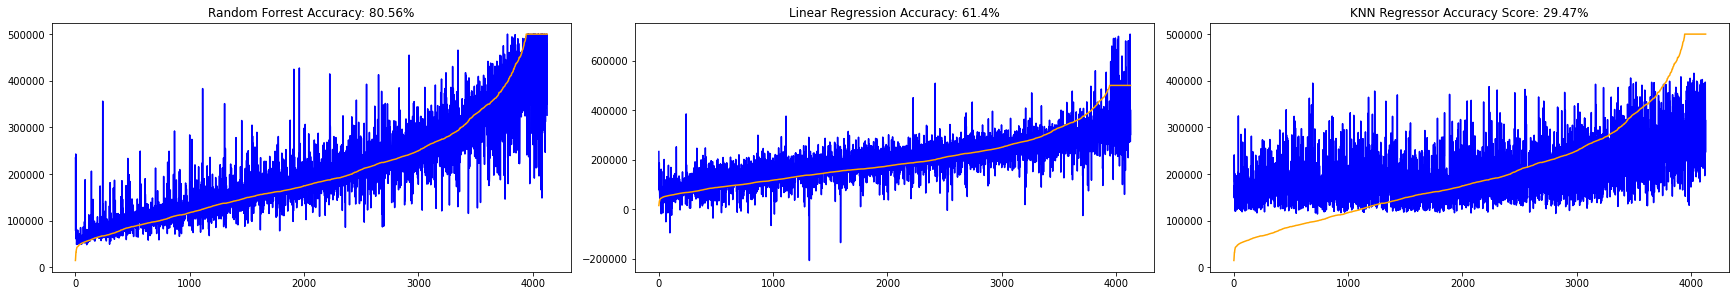

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score

ds_ = ds[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num', 'median_house_value']]
X_train, X_test, y_train, y_test = train_test_split(ds_[['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity_num']], ds_['median_house_value'], test_size = 0.2, random_state = 42)

model = RandomForestRegressor(max_depth = 20, random_state = 42)
model.fit(X_train, y_train)
randomforest_predictions = model.predict(X_test)
randomforest_score = model.score(X_test, y_test)

model = LinearRegression()
model.fit(X_train, y_train)
linreg_predictions = model.predict(X_test)
linreg_score = model.score(X_test, y_test)

model = KNeighborsRegressor(n_neighbors = int((math.sqrt(len(X_train)) / 2)))
model.fit(X_train, y_train)
knn_predictions = model.predict(X_test)
knn_score = model.score(X_test, y_test)

fig, axes = plt.subplots(1, 4, figsize = (24, 10), constrained_layout = True)
im_1 = axes[0].scatter(X_test['longitude'], X_test['latitude'], c = y_test, cmap = 'coolwarm')
im_2 = axes[1].scatter(X_test['longitude'], X_test['latitude'], c = randomforest_predictions, cmap = 'coolwarm')
im_3 = axes[2].scatter(X_test['longitude'], X_test['latitude'], c = linreg_predictions, cmap = 'coolwarm')
im_4 = axes[3].scatter(X_test['longitude'], X_test['latitude'], c = knn_predictions, cmap = 'coolwarm')
axes[0].set_title('Original Prices')
axes[1].set_title('Random Forest Predictions')
axes[2].set_title('Linear Regression Predictions')
axes[3].set_title('KNN Regressor Predictions')

color_bar = fig.colorbar(im_1, ax = axes[3], shrink = 0.5, label = "Housing Prices")
plt.show()




pred_test = pd.DataFrame({'test': np.array(y_test), 'rf_predictions': list(np.array(randomforest_predictions)), 'linreg_predictions': list(np.array(linreg_predictions)), 'knn_predictions': list(np.array(knn_predictions))}, 
            columns=['test', 'rf_predictions', 'linreg_predictions', 'knn_predictions'])
pred_test = pred_test.sort_values(by = 'test')
ind = range(len(pred_test))

fig, axes = plt.subplots(1, 3, figsize = (24, 4), constrained_layout = True)
axes[0].plot(ind, pred_test['rf_predictions'], color = 'blue')
axes[0].plot(ind, pred_test['test'], color = 'orange')

axes[1].plot(ind, pred_test['linreg_predictions'], color = 'blue')
axes[1].plot(ind, pred_test['test'], color = 'orange')

axes[2].plot(ind, pred_test['knn_predictions'], color = 'blue')
axes[2].plot(ind, pred_test['test'], color = 'orange')

axes[0].set_title("Random Forrest Accuracy: " + str(round(100 * randomforest_score, 2)) + "%")
axes[1].set_title("Linear Regression Accuracy: " + str(round(100 * linreg_score, 2)) + "%")
axes[2].set_title("KNN Regressor Accuracy Score: " + str(round(100 * knn_score, 2)) + "%")
plt.show()

#### Conclusion:
Best regression model is Random Forrest
- Random Forrest: 80.56%
- Linear Regression: 61.40%
- KNN Regressor: 29.47%